# NLP ASSIGNMENT 3

### Exercise 1

1. Use the train.tsv dataset at https://www.kaggle.com/c/sentiment-analysis-on-
movie-reviews/data

2. Take a look at the data and get info about the data
3. Count the number of expressed sentiments by category
4. Provide a histogram of sentiments by category
5. Generate document term matrix by using scikit-learn's CountVectorizer. Tokenize
and remove symbols and numbers
6. Split dataset (the test dataset represents 30% of the total data).
7. Import the MultinomialNB module and create a Multinomial Naive Bayes
classifier object using MultinomialNB() function. Compute the model accuracy.
8. TF-IDF(Term Frequency-Inverse Document Frequency) normalizes the
document term matrix. It is the product of TF and IDF. Word with high tf-idf in a
document, it is most of the times occurred in given documents and must be
absent in the other documents. So, the words must be a signature word. Use
TfidfVectorizer() for 'Phrase'.
9. Split dataset by using function train_test_split(). You need to pass basically 3
parameters features, target, and test_set size. Additionally, you can use
random_state to select records randomly.
10.Build the Text Classification Model using TF-IDF.
11.First, import the MultinomialNB module and create the Multinomial Naive Bayes
classifier object using MultinomialNB() function.
12.Then, fit your model on a train set using fit() and perform prediction on the test
set using predict().

In [1]:
## Importing the necessacery libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load data
df = pd.read_csv('train.tsv', sep='\t')

In [20]:
# Explore data 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB
None


In [5]:
# Print the top 5 rows in data set
print(df.head())
print(df.Sentiment.value_counts()) 

   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  
2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64


In [19]:
# Counting sentiments
Sentiment_counts = df.Sentiment.value_counts()
Sentiment_counts

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Frequency')

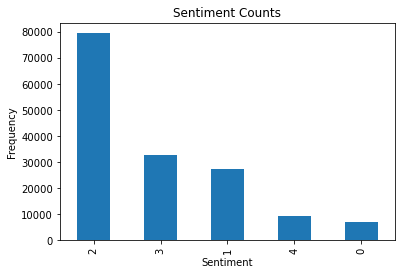

In [8]:
# Ploting histogram
Sentiment_counts.plot(kind='bar')
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Frequency")

In [10]:
# Creating document term matrix
count_vectorizer = CountVectorizer(tokenizer=lambda x: x.split()) 
dtm = count_vectorizer.fit_transform(df['Phrase'])
count_vectorizer

CountVectorizer(tokenizer=<function <lambda> at 0x000001C29A93A700>)

In [12]:
# Spliting the data into test and train
X_train, X_test, y_train, y_test = train_test_split(dtm, df['Sentiment'], test_size=0.3, random_state=42)

In [13]:
# Multinomial Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)
print("Accuracy:", nb.score(X_test, y_test))


Accuracy: 0.6108334401298646


In [14]:
# TF-IDF vectors
tfidf = TfidfTransformer()
X_train_tfidf = tfidf.fit_transform(X_train)


In [15]:
# Spliting the dataset for TF-IDF vectors
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_train_tfidf, y_train, test_size=0.3, random_state=42)


In [16]:
# creatinhg a Multinomial NB  classifier with TF-IDF
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train) 


MultinomialNB()

In [18]:
# Test model Acuracy
from sklearn.metrics import accuracy_score
predictions = nb_tfidf.predict(X_test_tfidf)
print("TF-IDF Accuracy:", accuracy_score(y_test, predictions))

TF-IDF Accuracy: 0.5789521862508773
